In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define the file path
file_path = r'C:/Users/rushi/Desktop/University of Maryland/1. Spring 2024/INST 414/Module 6 Assignment/social media influencers-YOUTUBE - --DEC 2022.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Strip any potential extra spaces from the column names
data.columns = data.columns.str.strip()

# Display the first few rows to check the data
data.head()

,s.no,Youtube channel,youtuber name,Category,Followers,Country,Views (Avg.),Likes (Avg.),Comments (Avg.),Category-2
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN
1,2,setindia,SET India,NaN,147.2M,India,0,0,0,NaN
2,3,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN
3,4,MrBeast,MrBeast,Video games,117M,United States,68.5M,2.9M,99.9K,Humor
4,5,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,NaN


In [18]:
def convert_to_numeric(x):
    if 'M' in x:
        return float(x.replace('M', '')) * 1e6
    elif 'K' in x:
        return float(x.replace('K', '')) * 1e3
    else:
        return float(x)

In [19]:
# Applying the conversion function to necessary columns
data['Followers'] = data['Followers'].apply(convert_to_numeric)
data['Views (Avg.)'] = data['Views (Avg.)'].apply(convert_to_numeric)
data['Likes (Avg.)'] = data['Likes (Avg.)'].apply(convert_to_numeric)
data['Comments (Avg.)'] = data['Comments (Avg.)'].apply(convert_to_numeric)

# Handling missing values if necessary (e.g., filling with the mean or median)
data['Category'].fillna('Unknown', inplace=True)
data['Country'].fillna('Unknown', inplace=True)
data['Category-2'].fillna('Unknown', inplace=True)

# Check the cleaned data
data.head()

,s.no,Youtube channel,youtuber name,Category,Followers,Country,Views (Avg.),Likes (Avg.),Comments (Avg.),Category-2
0,1,tseries,T-Series,Music & Dance,229500000.0,India,103800.0,2800.0,158.0,Unknown
1,2,setindia,SET India,Unknown,147200000.0,India,0.0,0.0,0.0,Unknown
2,3,checkgate,Cocomelon - Nursery Rhymes,Education,146600000.0,Unknown,9500000.0,48300.0,0.0,Unknown
3,4,MrBeast,MrBeast,Video games,117000000.0,United States,68500000.0,2900000.0,99900.0,Humor
4,5,PewDiePie,PewDiePie,Animation,111600000.0,United States,1400000.0,110700.0,7800.0,Unknown


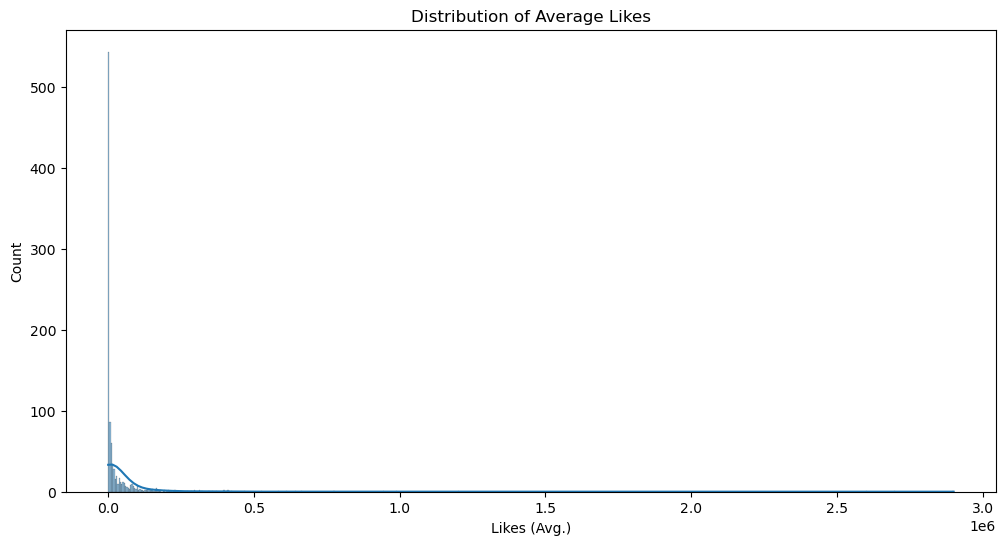

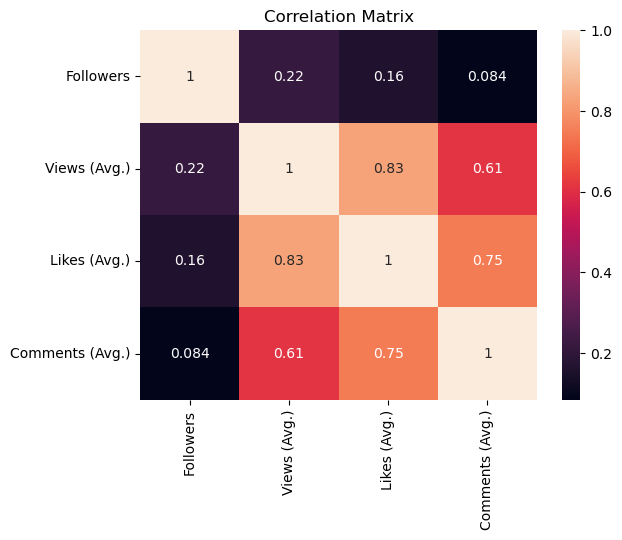

In [20]:
# Visualize the distributions of various features
plt.figure(figsize=(12, 6))
sns.histplot(data['Likes (Avg.)'], kde=True)
plt.title('Distribution of Average Likes')
plt.show()

# Display correlation matrix
corr_matrix = data[['Followers', 'Views (Avg.)', 'Likes (Avg.)', 'Comments (Avg.)']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Selecting features and target variable
features = data[['Followers', 'Views (Avg.)', 'Comments (Avg.)']]  # example feature set
target = data['Likes (Avg.)']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shapes of the split data
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((802, 3), (201, 3), (802,), (201,))

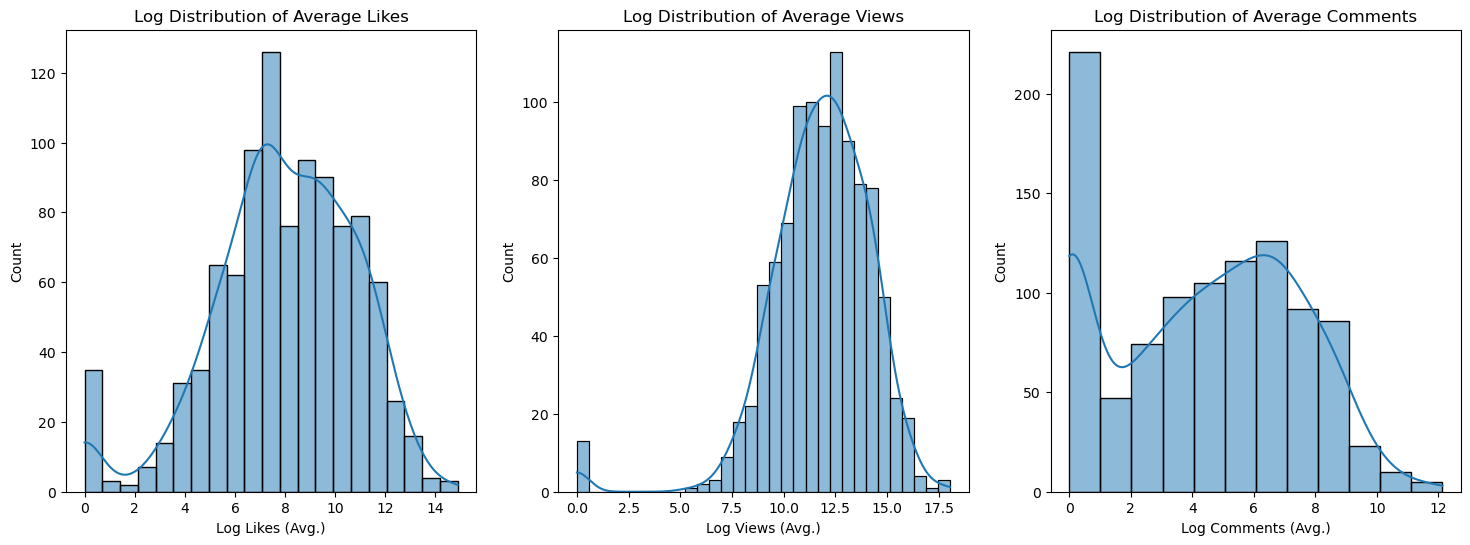

In [22]:
# Apply logarithmic transformation to reduce skewness in the data
# Adding 1 to avoid log(0) which is undefined
data['Log Likes (Avg.)'] = np.log1p(data['Likes (Avg.)'])
data['Log Views (Avg.)'] = np.log1p(data['Views (Avg.)'])
data['Log Comments (Avg.)'] = np.log1p(data['Comments (Avg.)'])

# Visualize the transformed distributions
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['Log Likes (Avg.)'], kde=True)
plt.title('Log Distribution of Average Likes')

plt.subplot(1, 3, 2)
sns.histplot(data['Log Views (Avg.)'], kde=True)
plt.title('Log Distribution of Average Views')

plt.subplot(1, 3, 3)
sns.histplot(data['Log Comments (Avg.)'], kde=True)
plt.title('Log Distribution of Average Comments')
plt.show()

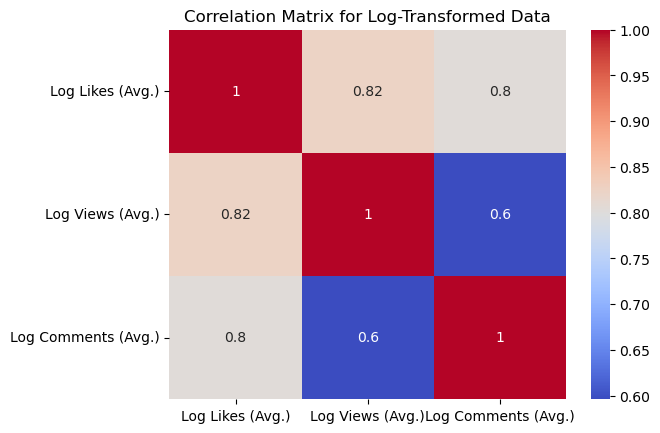

In [23]:
# Display correlation matrix for log-transformed data
log_corr_matrix = data[['Log Likes (Avg.)', 'Log Views (Avg.)', 'Log Comments (Avg.)']].corr()
sns.heatmap(log_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Log-Transformed Data')
plt.show()

In [24]:
# Selecting features and target for the transformed data
features_log = data[['Log Views (Avg.)', 'Log Comments (Avg.)']]  # Example feature set
target_log = data['Log Likes (Avg.)']

# Splitting the log-transformed data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features_log, target_log, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_log_scaled = scaler.fit_transform(X_train_log)
X_test_log_scaled = scaler.transform(X_test_log)

# Display shapes of the split data
X_train_log_scaled.shape, X_test_log_scaled.shape, y_train_log.shape, y_test_log.shape


((802, 2), (201, 2), (802,), (201,))

In [25]:
# Selecting features and target for the log-transformed data
features_log = data[['Log Views (Avg.)', 'Log Comments (Avg.)']]  # Example feature set
target_log = data['Log Likes (Avg.)']

# Splitting the log-transformed data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features_log, target_log, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_log_scaled = scaler.fit_transform(X_train_log)
X_test_log_scaled = scaler.transform(X_test_log)

In [26]:
# Building the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Alpha is a hyperparameter that controls the amount of regularization
ridge_model.fit(X_train_log_scaled, y_train_log)

# Predicting on the test set
y_pred_log = ridge_model.predict(X_test_log_scaled)

# Calculating the Mean Squared Error and R-squared for evaluation
mse = mean_squared_error(y_test_log, y_pred_log)
r_squared = r2_score(y_test_log, y_pred_log)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 1.4316892205396181
R-squared: 0.8099895017439884
